In [22]:
using PhyloNetworks
using PhyloPlots
using PhyloCoalSimulations
using Combinatorics
using Formatting

In [23]:
using CSV, DataFrames

function num_bipartitions(n)
    return 2^(n-1) - 1
end;

function get_nodes(idx)
    nodes = []
    for i in 1:length(idx)
        if idx[i]
            append!(nodes, i)
        end
    end
    return nodes
end


function get_bipartition(tree, n)
    taxa = sort(tipLabels(tree))
    if length(taxa) != n
        print("check the parameter n")
        return
    end
    node = Vector(1:n)
    result = []
    idx = 0
    for i in tree.edge
        node_idx = hardwiredCluster(i,taxa)
        branch_node = get_nodes(node_idx)
        
        # if branch seperates more than half nodes, we use the small part to get bipartition idx
        if (length(branch_node) > n ÷ 2)
             branch_node = sort(collect(setdiff(node,branch_node)))
        end
        
        # generate all possible combination with the same number of nodes
        comb = collect(combinations(Vector(1:n), length(branch_node)))
        for c in 1:length(comb)
            if comb[c] == branch_node
                # if the combination is the later, we need to find its first half
                if length(branch_node) > 1 && c > length(comb) ÷ 2
                    c = length(comb) - c + 1 
                end
                idx = c - 1
                break
            end
        end
        for j in 1:(length(branch_node) - 1)
            idx = idx + binomial(n,j)
        end
        push!(result,Pair(idx, i.length))
        idx = 0
    end
    return result
end;

function print_bipartition(trees, n)
    
    # build the table
    N = num_bipartitions(n)
    data = zeros(length(trees), N)
    treeNum = 1;
    # get existing index
    
    for i in trees
        bipart = get_bipartition(i, n)
        for j in 1:length(bipart)
            data[treeNum,(bipart[j][1] + 1)] += bipart[j][2]
        end
        treeNum+=1
    end
    return data
end;

function print_csv(path, n, target)
    tree = readMultiTopology(path)
    result = print_bipartition(tree, n)
    N = num_bipartitions(n)
    header = Vector(0:N - 1)
    header = string.(header)
    CSV.write(target, DataFrame(result, :auto),header = header) 
end;

In [19]:
tree_1 = "(((4:1.0, 3:1.0):1.0,2:1.0):1.0,1:1.0);"
tree_2 = "(((4:1.0, 2:1.0):1.0,3:1.0):1.0,1:1.0);"
tree_3 = "(((3:1.0, 2:1.0):1.0,4:1.0):1.0,1:1.0);"
tree_4 = "(((4:1.0, 3:1.0):1.0,1:1.0):1.0,2:1.0);"
tree_5 = "(((4:1.0, 1:1.0):1.0,3:1.0):1.0,2:1.0);"
tree_6 = "(((1:1.0, 3:1.0):1.0,4:1.0):1.0,2:1.0);"
tree_7 = "(((1:1.0, 2:1.0):1.0,4:1.0):1.0,3:1.0);"
tree_8 = "(((4:1.0, 2:1.0):1.0,1:1.0):1.0,3:1.0);"
tree_9 = "(((4:1.0, 1:1.0):1.0,2:1.0):1.0,3:1.0);"
tree_10 = "(((2:1.0, 1:1.0):1.0,3:1.0):1.0,4:1.0);"
tree_11 = "(((1:1.0, 3:1.0):1.0,2:1.0):1.0,4:1.0);"
tree_12 = "(((3:1.0, 2:1.0):1.0,1:1.0):1.0,4:1.0);"
tree_13 = "((4:1.0, 3:1.0):1.0,(2:1.0,1:1.0):1.0);"
tree_14 = "((4:1.0, 1:1.0):1.0,(2:1.0,3:1.0):1.0);"
tree_15 = "((4:1.0, 2:1.0):1.0,(3:1.0,1:1.0):1.0);"

"((4:1.0, 2:1.0):1.0,(3:1.0,1:1.0):1.0);"

In [20]:
trees_string = [tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,tree_10,tree_11,tree_12,tree_13,tree_14,tree_15];

In [21]:
using Random


function change_branch(newick_tree, seed, tree_i)
    tree_1 = readTopology(newick_tree);
    tree_2 = readTopology(newick_tree);
    tree_3 = readTopology(newick_tree);
    tree_4 = readTopology(newick_tree);
    tree_5 = readTopology(newick_tree);
    tree_6 = readTopology(newick_tree);

    Random.seed!(seed)
    

    n=length(tree_1.edge)

    for e in tree_2.edge
        e.length += 0.5
    end

    a = rand(0:100, n)
    i = 1
    
    for e in tree_3.edge
        inc = a[i]/100
        e.length += inc
        e.length = round(e.length, digits = 2)
        i += 1
    end
    

    for e in tree_4.edge
        e.length -= 0.5
    end

    i = 1
    for e in tree_5.edge
        dec = a[i]/100
        e.length -= dec
        e.length = round(e.length, digits = 2)
        i += 1
    end

    a = rand(-100:100, n)
    i = 1
    for e in tree_6.edge
        dec = a[i]/100
        e.length -= dec
        e.length = round(e.length, digits = 2)
        i += 1
    end
    
    trees = [tree_1,tree_2,tree_3,tree_4,tree_5,tree_6];
    return trees
end

change_branch (generic function with 1 method)

In [10]:
for i in 1:length(trees_string)
    trees = change_branch(trees_string[i], 123, i)
    for j in 1:length(trees)
        tree = simulatecoalescent(trees[j], 100, 1);
        path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_100.trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_100.trees" 
        target = "data/4_taxa_" * string(i) * "_" * string(j) * "_100.csv"
        print_csv(path, 4, target);
    end
end

In [11]:
for i in 1:length(trees_string)
    trees = change_branch(trees_string[i], 123, i)
    for j in 1:length(trees)
        tree = simulatecoalescent(trees[j], 1000, 1);
        path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_1000.trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_1000.trees" 
        target = "data/4_taxa_" * string(i) * "_" * string(j) * "_1000.csv"
        print_csv(path, 4, target);
    end
end

In [12]:
for i in 1:length(trees_string)
    trees = change_branch(trees_string[i], 123, i)
    for j in 1:length(trees)
        tree = simulatecoalescent(trees[j], 5000, 1);
        path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_5000.trees" 
        writeMultiTopology(tree, path)
        path = "./data/rawdata/4_taxa_" * string(i) * "_" * string(j) * "_5000.trees" 
        target = "data/4_taxa_" * string(i) * "_" * string(j) * "_5000.csv"
        print_csv(path, 4, target);
    end
end

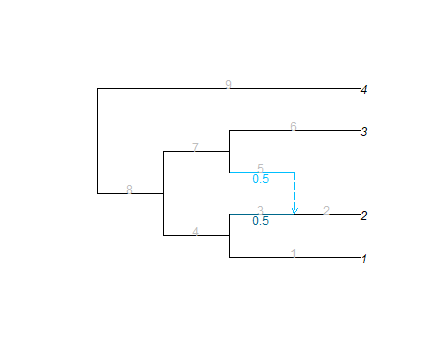

(0.6, 5.44, 0.5, 5.5, [5.0, 5.0, 4.0, 3.0, 5.0, 3.0, 2.0, 5.0, 1.0], [1.0, 2.0, 2.0, 1.5, 4.0, 3.5, 2.5, 5.0, 3.75], [1.0, 2.0, 2.0, 1.0, 4.0, 3.0, 1.5, 5.0, 2.5], [1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.5, 5.0, 5.0], [3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0], [5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 3.0, 2.0, 5.0], [1.0, 2.0, 2.0, 1.5, 3.0, 4.0, 3.5, 2.5, 5.0], [1.0, 2.0, 2.0, 1.5, 3.0, 4.0, 3.5, 2.5, 5.0], 4×6 DataFrame
 Row │ name    num     lab     lea   x        y       
     │ String  String  String  Bool  Float64  Float64 
─────┼────────────────────────────────────────────────
   1 │ 1       1       #undef  true      5.0      1.0
   2 │ 2       2       #undef  true      5.0      2.0
   3 │ 3       4       #undef  true      5.0      4.0
   4 │ 4       5       #undef  true      5.0      5.0, 9×8 DataFrame
 Row │ len     gam     num     lab     hyb    min    x        y       
     │ String  String  String  String  Bool   Bool   Float64  Float64 
─────┼───────────────────────────────────────────

In [30]:
net = readTopology("(((1:1.0,(2:0.5)#H1:0.5::0.5):1.0,(#H1:0.5::0.5, 3:0.5)):1.0,4:1.0);");
plot(net,showgamma=true, showedgenumber=true,)

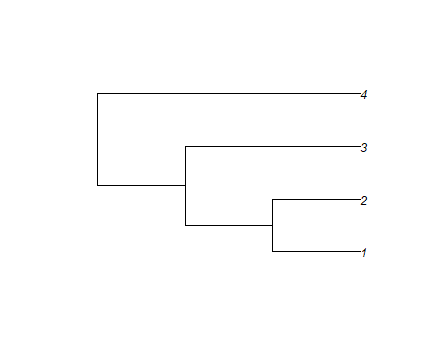

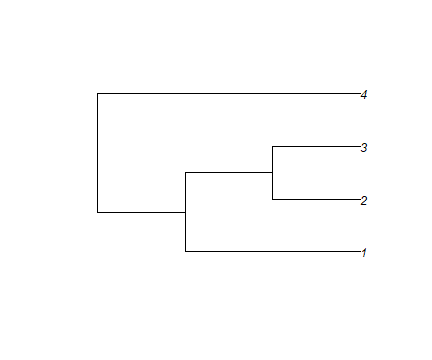

In [34]:
tree_p1 = readTopology("(((1:1.0,2:1.0):1.0, 3:1.0):1.0,4:1.0);");
plot(tree_p1);
tree_p2 = readTopology("((1:1.0,(2:1.0, 3:1.0):1.0):1.0,4:1.0);");
plot(tree_p2);